In [26]:
# pip install librosa

In [27]:
#The output of this section is the CSV files with the data to be handle by the model
CREATE_CSV_FILES = True

In [28]:
# Defines the names of the CSV files
TRAIN_CSV_FILE = "Speaker_Train_File_otw2.csv"    # train  60
TEST_CSV_FILE = "Speaker_Test_File_otw2.csv"      # test 16

In [29]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
from matplotlib import cm
import pandas as pd
import librosa
import zipfile as zf
import csv
import os
from sklearn import metrics
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import csv
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.mixture import GaussianMixture

In [30]:
def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'  
    # for i in range(1, 41):
    #     header += f' mfcc{i}'  #making headers of csv file
    header += ' label'     
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    for filename in os.listdir(soundFilesFolder):
        if filename.endswith('.wav'):
            number = f'{soundFilesFolder}/{filename}'
            y, sr = librosa.load(number, mono=True, duration=30)
            # remove leading and trailing silence
            y, index = librosa.effects.trim(y)
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rms(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            # mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 40)
            to_append = f'{filename[:-4]} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
            # for e in mfcc:
            #     to_append += f' {np.mean(e)}'
            writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")

In [31]:
if (CREATE_CSV_FILES == True):
    extractWavFeatures("training_set", TRAIN_CSV_FILE)
    extractWavFeatures("Speaker_Test_Data", TEST_CSV_FILE)
    print("CSV files are created")
else:
    print("CSV files creation is skipped")

The features of the files in the folder training_set will be saved to Speaker_Train_File_otw2.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'label']
End of extractWavFeatures
The features of the files in the folder Speaker_Test_Data will be saved to Speaker_Test_File_otw2.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'label']
End of extractWavFeatures
CSV files are created


In [32]:
#Reading a dataset and convert file name to corresbonding umnber
def preProcessData(csvFileName):
    header_name_list = ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27', 'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34', 'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39', 'mfcc40', 'label']
    print(csvFileName+ " will be preprocessed")
    data =  pd.read_csv(csvFileName)
#     data = pd.read_csv(csvFileName, skiprows=[1, 50]
    # we have 3 speakers: 
    # 0: ahmed
    # 1: belal
    # 2: micheal
    # 3: others
    filenameArray = data['filename'] 
    speakerArray = []
#     print(filenameArray)
    for filename in filenameArray:
        #print(speaker)
        if "OTD" in filename:
            speaker = 0
        elif "1_mohab" in filename:
            speaker = 0
        elif "1_marina" in filename:
               speaker = 0
        else: 
            speaker = 3
#         print(speaker)
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    # data = data.drop(['chroma_stft'],axis=1)
    # data = data.drop(['mfcc1'], axis=1)
#     data.shape
#     print("Preprocessing is finished")
#     print(data['rmse'])
    print(data)
    return data

In [33]:
trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE)

Speaker_Train_File_otw2.csv will be preprocessed
     chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0       0.337667  0.013404        1288.854671         1518.160524   
1       0.363886  0.009993        1222.905682         1460.351945   
2       0.275599  0.017168        1253.064143         1425.561648   
3       0.328698  0.018104        1198.371032         1500.572803   
4       0.364303  0.016585        1230.753953         1509.360576   
..           ...       ...                ...                 ...   
351     0.447067  0.014330        1256.363929         1407.134373   
352     0.470880  0.010075        1185.632158         1367.412051   
353     0.427548  0.013756        1108.288493         1319.804104   
354     0.446211  0.011683        1173.559591         1355.675149   
355     0.460148  0.013097        1114.507464         1309.830857   

         rolloff  zero_crossing_rate  number  
0    2435.184420            0.059564       0  
1    2157.293701            

In [34]:
testData

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,number
0,0.363886,0.009993,1222.905682,1460.351945,2157.293701,0.060233,0
1,0.364303,0.016585,1230.753953,1509.360576,2346.060131,0.049973,0
2,0.340484,0.013829,1166.165148,1480.120271,2109.620577,0.050800,0
3,0.376980,0.015517,1387.471357,1609.152266,2662.320683,0.058013,0
4,0.334539,0.015835,1276.583495,1634.214861,2637.144470,0.039693,0
...,...,...,...,...,...,...,...
88,0.452994,0.042985,1814.419202,2068.841427,3832.619167,0.078574,3
89,0.441280,0.036381,1995.008828,2102.141285,3936.269531,0.079740,3
90,0.473269,0.030267,2145.997022,2248.043801,4451.083646,0.099725,3
91,0.468767,0.029816,2035.026065,2295.683010,4361.697110,0.084806,3


In [35]:
# Splitting the dataset into training, validation and testing dataset

X = trainData[trainData.columns[:-1]]
y = trainData[trainData.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41 )


# X_test = np.array(testData.iloc[:, :-1], dtype = float)
# y_test = testData.iloc[:, -1]

#X_test = X_val
#y_test = y_val
print("Y from training data:", y_train.shape)
print("Y from validation data:", y_test.shape)
print("Y from test data:", y_test.shape)

Y from training data: (320,)
Y from validation data: (36,)
Y from test data: (36,)


In [36]:
X_train

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate
45,0.460989,0.023924,1987.875204,2807.098605,4993.908691,0.051449
153,0.479739,0.018974,1279.628098,1477.818089,2190.817787,0.101170
110,0.497039,0.017452,1266.775962,1431.468729,2207.895845,0.101714
87,0.481334,0.027826,1493.556726,1578.852092,2529.780105,0.111749
281,0.478186,0.013919,1352.357988,1460.126855,2488.570009,0.103274
...,...,...,...,...,...,...
282,0.461829,0.010196,1216.531084,1399.652654,2088.473195,0.096147
89,0.431796,0.025979,1420.589894,1528.818053,2438.944639,0.108101
243,0.485613,0.013642,1413.154512,1494.459020,2495.995252,0.111165
321,0.472857,0.013034,1181.765907,1276.578123,2058.277209,0.100199


In [37]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler, normalize
import numpy as np
#scaler = StandardScaler()
#X_train = scaler.fit_transform( X_train )
#X_test = scaler.transform( X_test )
#X_train = normalize(X_train)
#X_test = normalize (X_test)
print("X from training data", X_train.shape)
print("X from test data", X_test.shape)

X from training data (320, 6)
X from test data (36, 6)


In [38]:

X_train.shape

(320, 6)

In [39]:
# gmm=GaussianMixture(n_components=6, max_iter=200 , covariance_type="diag" , n_init=3)
# gmm.fit(X_train)

In [40]:
#Create an object (model)
dtr1 = DecisionTreeClassifier(max_depth =7, random_state = 10)
#Fit (train) the model

#X_train = X_train.astype('int')

#y_train=y_train.astype('int')


dtr1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=10)

In [41]:
np.unique(y_train  ,return_counts = True)


(array([0, 3], dtype=int64), array([120, 200], dtype=int64))

In [42]:
np.unique(y_test  ,return_counts = True)


(array([0, 3], dtype=int64), array([15, 21], dtype=int64))

In [43]:
pd.DataFrame(X_train)[pd.DataFrame(X_train).columns[3:9]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 45 to 80
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spectral_bandwidth  320 non-null    float64
 1   rolloff             320 non-null    float64
 2   zero_crossing_rate  320 non-null    float64
dtypes: float64(3)
memory usage: 10.0 KB


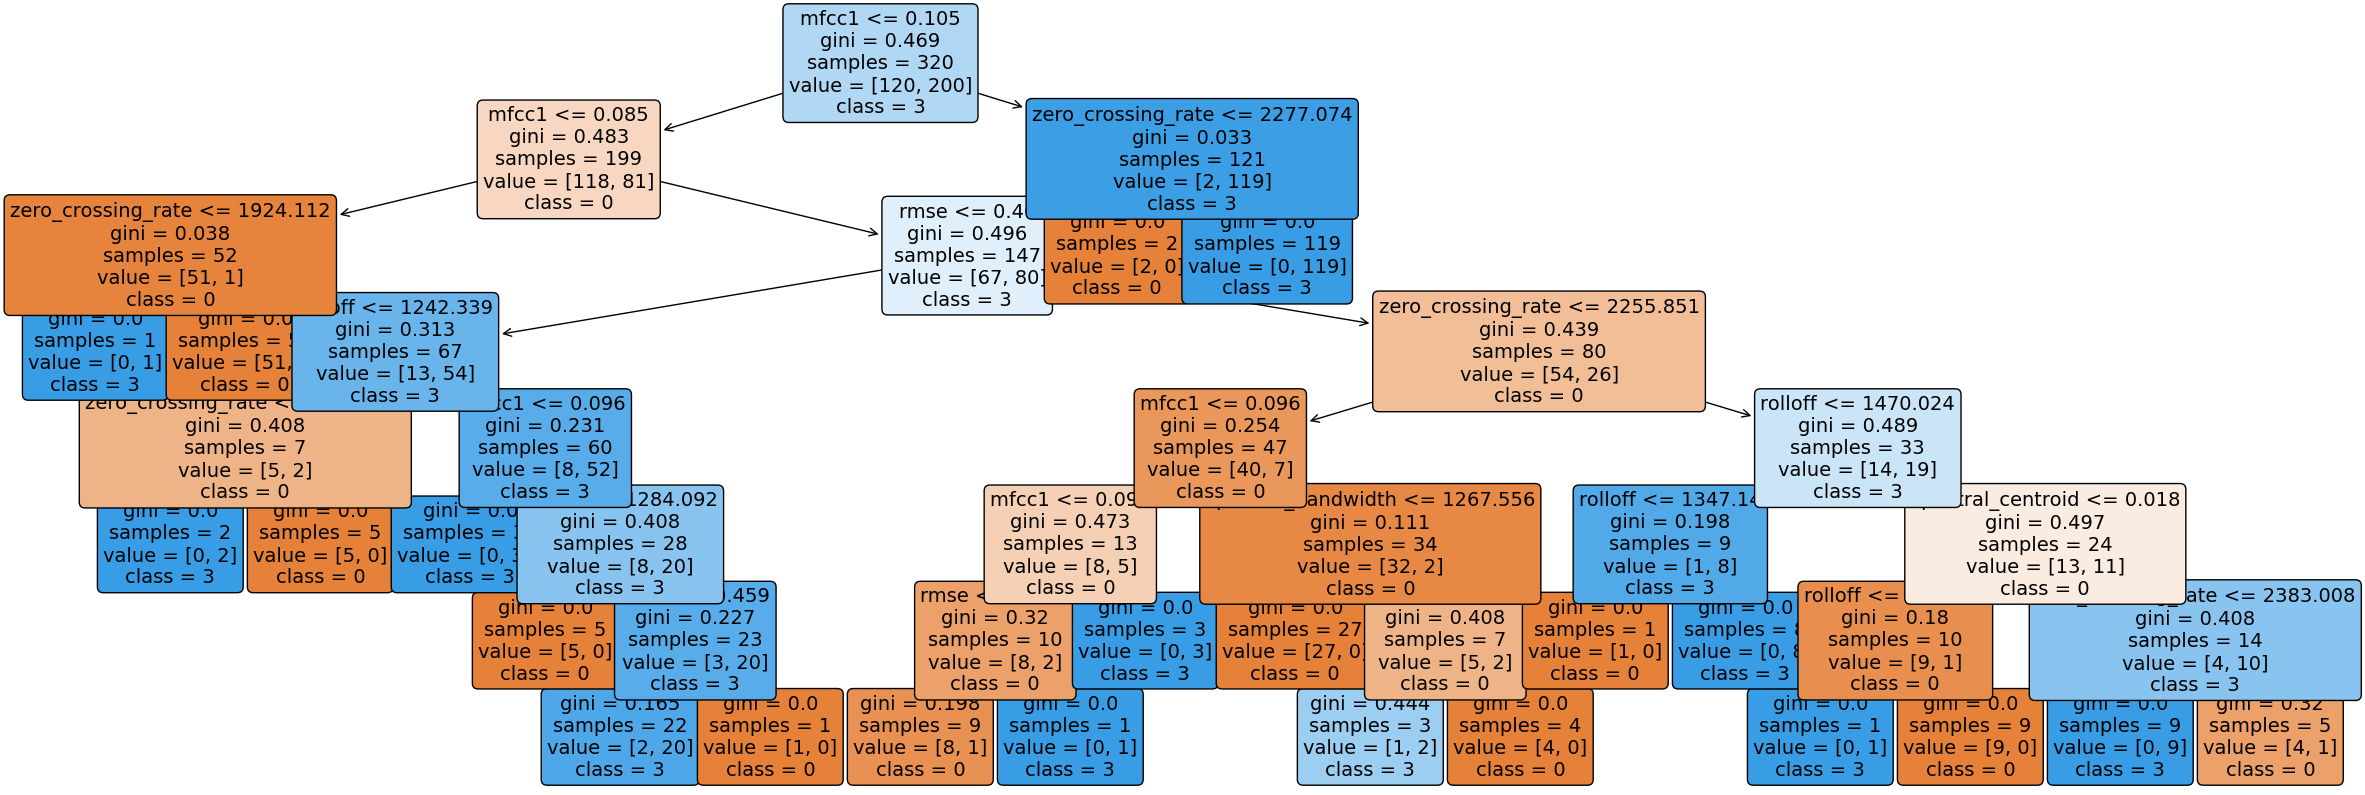

In [45]:
#plt the figure, setting a black background
plt.figure(figsize=(30,10))
#create the tree plot
a = tree.plot_tree(dtr1,feature_names = list(['rmse', 'spectral_centroid', 'spectral_bandwidth', 
                   'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 
                   'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 
                   'mfcc20', 'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27', 'mfcc28', 'mfcc29', 'mfcc30', 
                   'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34', 'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39', 'mfcc40']),
                   class_names = ["0","3"],
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [ ]:
# data = preProcessData('Speaker_File.csv')
test_pred_decision_tree = dtr1.predict(X_test)

print(test_pred_decision_tree)
print(np.array(y_test))


[0 3 3 0 0 3 0 3 3 3 3 3 3 0 3 3 3 0 0 0 3 3 3 3 3 3 0 0 3 3 3 3 0 0 0 0]
[0 3 3 3 0 3 0 3 3 3 3 3 3 0 3 3 3 0 0 0 3 3 3 3 3 3 0 0 0 3 0 3 0 0 0 0]


In [ ]:
y_test=y_test.astype('int64')

print("Accuracy:",metrics.accuracy_score(y_test, test_pred_decision_tree))

Accuracy: 0.9166666666666666


In [ ]:
def report(X_data, y_data):
    #Confution Matrix and Classification Report
    Y_pred = dtr1.predict(X_data)
    y_test_num = y_data.astype(np.int64)
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    print('\nClassification Report')
    # target_names = ["Marina", "Mohab", "Unknown"]
    print(classification_report(y_test_num, Y_pred))

Classification Report for Test Data

[[13  2]
 [ 1 20]]


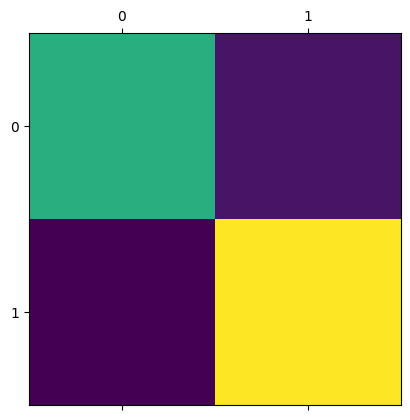


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           3       0.91      0.95      0.93        21

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



In [ ]:
print("Classification Report for Test Data\n")
report(X_test, y_test)

In [ ]:
# save the model to disk
import pickle
filename = 'senteneopen_final.sav'
pickle.dump(dtr1, open(filename, 'wb'))


# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_model =pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.9166666666666666